Univariate_ROC_AUC
------

This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it ranks the features according to the machine learning metric (roc-auc or mse)


It selects the highest ranked features
I will demonstrate how to select features based on univariate roc-auc or univariate mse information on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [12]:
file_path = '/Users/wontaek/Documents/Lecture_dataset/BNP_Paribas_Cardif_claims/train.csv'
data = pd.read_csv(file_path, nrows=50000)
data.shape

(50000, 133)

In [13]:
data.head(10)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,0.049861,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,0.899806,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,0.083758,BJ,3.276100,1.623298,2.266575,0,2.263736,0.970873
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,0.018659,S,1.159637,5.582865,1.105283,0,1.170731,3.333334
9,23,1,1.144802,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,0.008944,E,1.344550,1.601176,1.928009,0,3.174603,1.000000


In [14]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

## Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [16]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [19]:
clf.predict_proba?

Signature: clf.predict_proba(X, check_input=True)
Docstring:
Predict class probabilities of the input samples X.

The predicted class probability is the fraction of samples of the same
class in a leaf.

check_input : boolean, (default=True)
    Allow to bypass several input checking.
    Don't use this parameter unless you know what you do.

Parameters
----------
X : array-like or sparse matrix of shape = [n_samples, n_features]
    The input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csr_matrix``.

check_input : bool
    Run check_array on X.

Returns
-------
p : array of shape = [n_samples, n_classes], or a list of n_outputs
    such arrays if n_outputs > 1.
    The class probabilities of the input samples. The order of the
    classes corresponds to that in the attribute `classes_`.
File:      ~/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py
Type:      method


In [21]:
pd.DataFrame(y_scored).T

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,0.227278,0.5,0.0,1.0,0.227278,0.227278,0.5,1.0,0.227278,0.227278,...,0.227278,0.227278,0.0,0.227278,0.227278,0.227278,0.216216,0.227278,0.0,0.0
1,0.772722,0.5,1.0,0.0,0.772722,0.772722,0.5,0.0,0.772722,0.772722,...,0.772722,0.772722,1.0,0.772722,0.772722,0.772722,0.783784,0.772722,1.0,1.0


In [22]:
# let's add the variable names and order it for clearer visualisation

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

v10     0.625163
v50     0.591156
v14     0.579888
v129    0.573197
v62     0.566037
v72     0.539332
v12     0.529780
v21     0.517761
v38     0.515919
v70     0.514846
v29     0.514097
v2      0.512687
v42     0.512631
v89     0.512050
v6      0.511649
v83     0.511569
v67     0.511338
v105    0.511070
v100    0.510965
v48     0.510883
v15     0.510686
v111    0.510544
v27     0.510491
v20     0.510463
v9      0.510288
v63     0.510131
v68     0.510075
v49     0.510015
v116    0.509963
v34     0.509917
          ...   
v64     0.502774
v76     0.502680
v59     0.502592
v4      0.502406
v23     0.502381
v44     0.502332
v77     0.502328
v92     0.502253
v33     0.502221
v93     0.501968
v97     0.501951
v40     0.501601
v65     0.501190
v86     0.501089
v84     0.500589
v25     0.500071
v95     0.499789
v119    0.499721
v7      0.499702
v32     0.499451
v82     0.499411
v118    0.497980
v131    0.497810
v102    0.497653
v109    0.496904
v85     0.496781
v28     0.496571
v73     0.4960

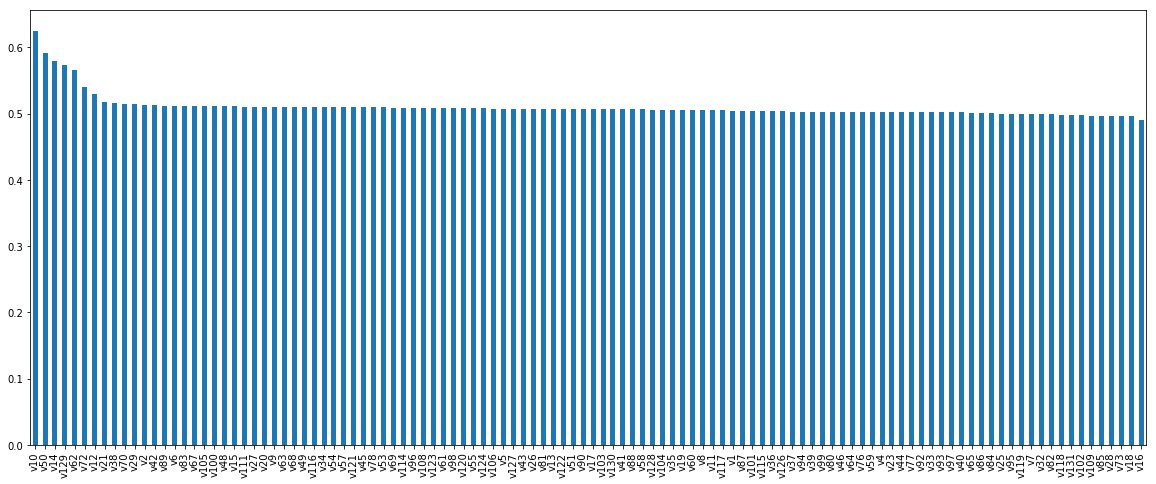

In [23]:
# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [24]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

98

98 of 112 features show a predictive performance higher than 0.5. This means that we could remove 14 features from this dataset using this method.
- 이런 방식으로 14개의 feature를 제거

You can of course tune the parameters of the Decision Tree and get better predictions. I leave this to you. But remember that the key here is not to make ultra predictive Decision Trees, rather to use them to screen quickly for important features. So I would recommend you don't spend too much time tuning. Doing cross validation with sklearn should be very straight forward to get a more accurate measure of the roc-auc per feature.

Once again, where we put the cut-off to select features is a bit arbitrary, other than > 0.5. It will be up to you.

## Regression

In [26]:
# load dataset
data = pd.read_csv('/Users/wontaek/Documents/Lecture_dataset/House_Sale_Price//train.csv')
data.shape

(1460, 81)

In [27]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [28]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [29]:
# loop to build a tree, make predictions and get the mse
# for each feature of the train set
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    
    mse_values.append(mean_squared_error(y_test, y_scored))

In [30]:
# let's add the variable names and order it for clearer visualisation
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

Id               1.326803e+10
BsmtUnfSF        1.011789e+10
LotArea          8.379937e+09
MasVnrArea       7.867109e+09
BsmtFinSF1       7.696158e+09
WoodDeckSF       7.271460e+09
3SsnPorch        6.948829e+09
OpenPorchSF      6.886315e+09
MoSold           6.875928e+09
YrSold           6.832078e+09
LotFrontage      6.827291e+09
PoolArea         6.816711e+09
BsmtFinSF2       6.806977e+09
BsmtHalfBath     6.798179e+09
EnclosedPorch    6.797342e+09
MiscVal          6.791047e+09
LowQualFinSF     6.764285e+09
ScreenPorch      6.707080e+09
KitchenAbvGr     6.665297e+09
BedroomAbvGr     6.642833e+09
1stFlrSF         6.496486e+09
BsmtFullBath     6.486271e+09
HalfBath         6.072529e+09
OverallCond      6.026309e+09
2ndFlrSF         5.816917e+09
TotalBsmtSF      5.669278e+09
Fireplaces       5.295673e+09
MSSubClass       5.258424e+09
GrLivArea        5.208607e+09
YearRemodAdd     5.138584e+09
TotRmsAbvGrd     5.076108e+09
GarageArea       4.960935e+09
YearBuilt        4.776575e+09
GarageYrBl

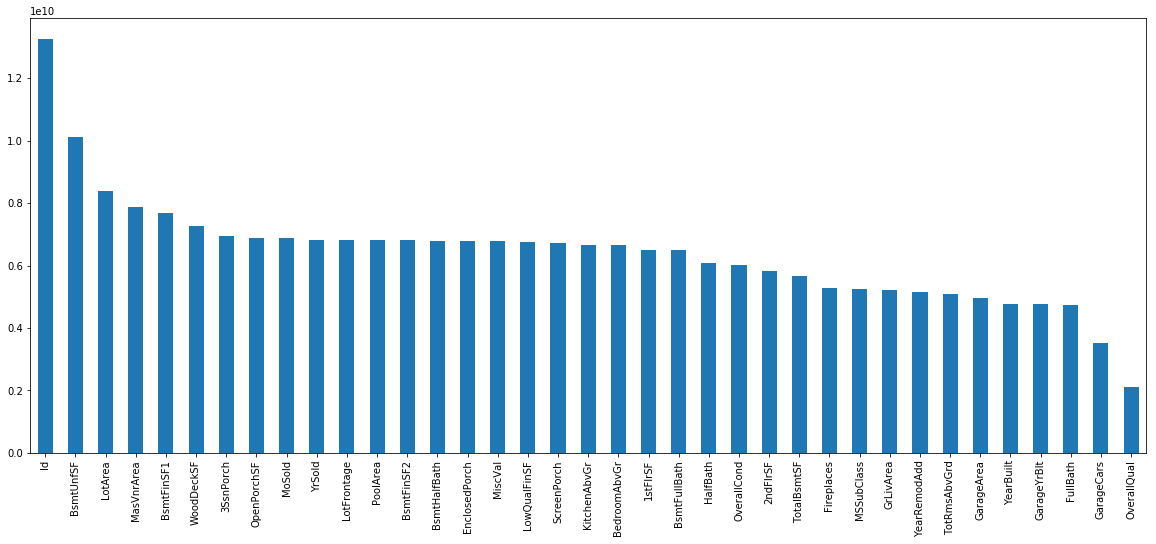

In [31]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Remember that for regression, the smaller the mse, the better the model performance is. So in this case, we need to select from the right to the left.
- mse는 작은 것이 좋다.

For the mse, where to put the cut-off is arbitrary as well. It depends on how many features you would like to end up with.

I do use this method in my projects, particularly when I have an enormous amount of features and I need to start reducing the feature space quickly.

You can see an example use case in my talk at pydata London
- 강의 링크였는데 유튜브 계정이 해지되어서 못 봄

That is all for this lecture, I hope you enjoyed it and see you in the next one!